# A3 CLASSIFICATION USING A MLP.

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import tensorflow as tf 
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

In [2]:
df=pd.read_csv('./GTC_clean.csv', sep=';') #read the dataset

In [3]:
X = df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency']]
y=df['CLASS']#FHR

In [4]:
#encode in proper form 1d array.
encoder = LabelEncoder().fit(y)
y_bool = encoder.transform(y) 
y = np_utils.to_categorical(y_bool) 


## Standarize the data 

In [5]:
scaler=MinMaxScaler()
scaled_x = scaler.fit_transform(X)
scaled_y=scaler.fit_transform(y)

In [6]:
len_data = X.shape[0]
print("Length of data:%d" % len_data)
train_size = int(len_data * .6) #60 % of the data will be for training.
valid_size = int(len_data * .1) #10% of the data will be for validation.
print ("Train  Data size: %d" % train_size) 
print ("Validation Data size: %d" % valid_size)
print ("Test Data size: %d" % (len_data - (train_size+valid_size))) #30% of the data will be for testing.


Length of data:2114
Train  Data size: 1268
Validation Data size: 211
Test Data size: 635


### Training 

In [7]:
xtr = scaled_x[:train_size,:]
ytr = scaled_y[:train_size,:]
ytr_bool = y_bool[:train_size]

### Validation 

In [8]:
xva = scaled_x[train_size:train_size+valid_size,:]
yva = scaled_y[train_size:train_size+valid_size,:]
yva_bool = y_bool[train_size:train_size+valid_size]

### Testing 

In [9]:
xte = scaled_x[train_size+valid_size:,:]
yte = scaled_y[train_size+valid_size:,:]
yte_bool = y_bool[train_size+valid_size:]

# Building our model with 4 layers and using as output activation function softmax because it is a classification mlp. 

In [104]:
model = Sequential()
model.add(Dense(15, input_dim=21, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Compile our model with accuracy metric in orde to view accuracy. 

In [105]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
model.summary() #the summary of the layers.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 15)                330       
_________________________________________________________________
dense_25 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                160       
Total params: 730
Trainable params: 730
Non-trainable params: 0
_________________________________________________________________


## The actual training and validation.

In [107]:
history = model.fit(xtr, ytr, validation_data=(xva, yva), epochs=65, batch_size=1, verbose=2)

Epoch 1/65
1268/1268 - 1s - loss: 1.9168 - accuracy: 0.3194 - val_loss: 1.6429 - val_accuracy: 0.3223
Epoch 2/65
1268/1268 - 0s - loss: 1.3829 - accuracy: 0.5292 - val_loss: 1.2264 - val_accuracy: 0.6398
Epoch 3/65
1268/1268 - 0s - loss: 1.0796 - accuracy: 0.6301 - val_loss: 0.9641 - val_accuracy: 0.7156
Epoch 4/65
1268/1268 - 1s - loss: 0.9023 - accuracy: 0.6869 - val_loss: 0.8144 - val_accuracy: 0.7441
Epoch 5/65
1268/1268 - 1s - loss: 0.8068 - accuracy: 0.7169 - val_loss: 0.7643 - val_accuracy: 0.7346
Epoch 6/65
1268/1268 - 1s - loss: 0.7496 - accuracy: 0.7492 - val_loss: 0.7521 - val_accuracy: 0.7393
Epoch 7/65
1268/1268 - 1s - loss: 0.7073 - accuracy: 0.7650 - val_loss: 0.6905 - val_accuracy: 0.7773
Epoch 8/65
1268/1268 - 1s - loss: 0.6756 - accuracy: 0.7674 - val_loss: 0.7113 - val_accuracy: 0.7678
Epoch 9/65
1268/1268 - 1s - loss: 0.6594 - accuracy: 0.7721 - val_loss: 0.6624 - val_accuracy: 0.7630
Epoch 10/65
1268/1268 - 1s - loss: 0.6320 - accuracy: 0.7705 - val_loss: 0.6549 - 

## Plot the loss function progression.

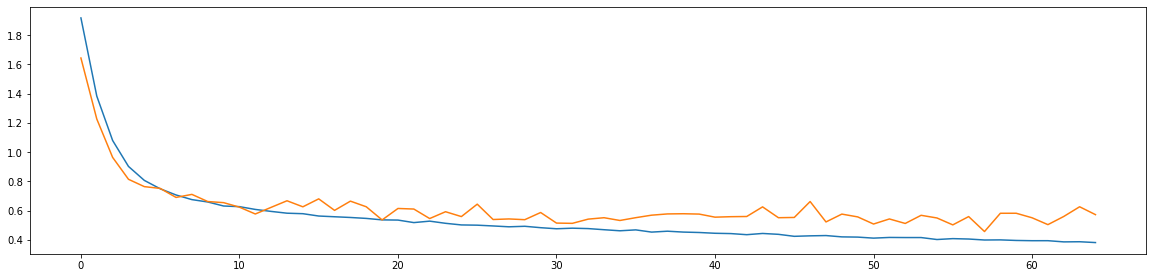

In [115]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss']) #blue
plt.plot(history.history['val_loss']) #orange
plt.savefig('./mlp_classification_loss_function.png')
plt.show()


## Plot the accuracy progression. 

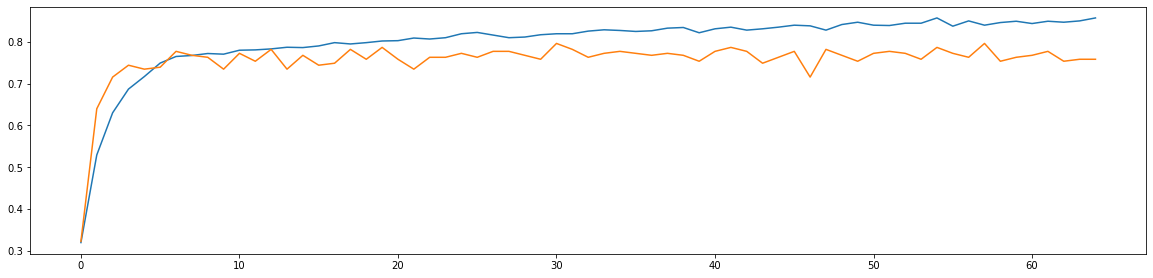

In [116]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])#blue
plt.plot(history.history['val_accuracy'])#orange
plt.savefig('./mlp_classification_accuracy.png')
plt.show()

### Training accuracy. 

In [110]:
ytr_pred = model.predict_classes(xtr, verbose=0)
print("Train Accuracy by model.predict: %.2f%%" % (100*sum(ytr_bool == ytr_pred)/ytr.shape[0]))

Train Accuracy by model.predict: 84.31%


### Vlidation accuracy. 

In [111]:
yva_pred = model.predict_classes(xva, verbose=0)
print("Val Accuracy by model.predict: %.2f%%" % (100*sum(yva_bool == yva_pred)/yva.shape[0]))

Val Accuracy by model.predict: 75.83%


### Prediction accuracy. (True accuracy) 

In [112]:
yte_pred = model.predict(xte, batch_size=1, verbose=0)
yte_pred_bool = np.argmax(yte_pred, axis=1)

print("Test Accuracy by model.predict: %.2f%%" % (100*sum(yte_bool == yte_pred_bool)/yte.shape[0]))


Test Accuracy by model.predict: 69.13%


In [113]:
#model.save_weights('./classification_model_a') # save the trained model in otder to use it again.

## Using matthews correlation coefficient in order to view model's success.

In [118]:
print("Train MMC: ", matthews_corrcoef(ytr_bool, ytr_pred))
print("Validation MMC: ", matthews_corrcoef(yva_bool, yva_pred))
print("Test MMC: ", matthews_corrcoef(yte_bool, yte_pred_bool))


Train MMC:  0.8114675946557428
Validation MMC:  0.7009697012402853
Test MMC:  0.6317555046889216


## Display confusion matrices for each stage.

In [119]:
print("Training confusion matrix:")
print(confusion_matrix(ytr_bool, ytr_pred))
print("Validation confusion matrix:")
print(confusion_matrix(yva_bool, yva_pred))
print("Testing confusion matrix:")
print(confusion_matrix(yte_bool, yte_pred_bool))

Training confusion matrix:
[[239  12   9   0   0   3   3   0   0   2]
 [  3 331   0   1   0  10   0   0   0   0]
 [ 20   1  14   0   0   0   2   0   0   0]
 [  0  12   0  59   0   0   0   0   0   0]
 [ 15   7   1   0  14   0   0   0   0   7]
 [  2   1   0   0   0 121   2   0   0   0]
 [  3   0   0   0   0   6 100   4   0   0]
 [  0   0   0   0   0   0   1  12   0   0]
 [  1   0   0   0   0   0   0   0  46  20]
 [ 41   0   0   0   1   0   0   0   9 133]]
Validation confusion matrix:
[[15  0  2  0  0  0  0  0  0]
 [ 3 57  0  4  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0]
 [15  2  0  0  1  0  0  0  0]
 [ 0  2  0  1  0 57  2  1  0]
 [ 0  0  0  0  0  6 23  5  0]
 [ 0  0  0  0  0  1  0  4  0]
 [ 6  0  0  0  0  0  0  0  0]]
Testing confusion matrix:
[[ 37  13   1   0   0   1   1   0   7  38]
 [  0 153   0   4   1   5   1   0   1   0]
 [  9   0   4   0   0   0   0   0   0   1]
 [  0   5   0   2   0   0   0   0   0   0]
 [  4   2   0   0   1   0   0   0   0   3]
 